In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd, numpy as np

In [8]:
cust_data = pd.read_csv("C:/Users/gajas/Desktop/santhosh_Data_Science/Telecom_Churn/Telecom Churn/customer_data.csv")

In [9]:
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
churn_data = pd.read_csv("C:/Users/gajas/Desktop/santhosh_Data_Science/Telecom_Churn/Telecom Churn/churn_data.csv")

In [11]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
int_data = pd.read_csv("C:/Users/gajas/Desktop/santhosh_Data_Science/Telecom_Churn/Telecom Churn/internet_data.csv")

In [14]:
int_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


Combining all data into one consolidated dataframe

In [15]:
# merging on cust_id
df1 = pd.merge(churn_data, cust_data, how = 'inner', on ='customerID')

In [85]:
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [16]:
# final dataframe with all predictor variables
telecom = pd.merge(df1, int_data, how = 'inner', on = 'customerID')

In [17]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


##  EDA

In [18]:
telecom.isna().sum().sum()
telecom.columns


Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [19]:
telecom.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable has imbalanced class distribution. Positive class (Churn=Yes) is much less than negative class (churn=No). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

It is always beneficial to explore the features (independent variables) before trying to build a model. Let’s first discover the features that only have two values.

Inspecting the DataFrame

In [20]:
telecom.shape

(7043, 21)

In [21]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [22]:
#Each data type of columns
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


Data Preparation

converting some binary variables (Yes/No) to 0/1

In [23]:
#List of variables to map

varlist = ['PhoneService' , 'PaperlessBilling', 'Churn','Partner', 'Dependents' ]

#Defining the map function

def binary_map(x):
    return x.map({'Yes' : 1, 'No' : 0})

# applying the housing list

telecom[varlist] = telecom[varlist].apply(binary_map) 

In [24]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


## For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [25]:
#creating a dummy variables for some of the categorical variables and dropping the first one 

dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first= True)

# adding the results to the master ddata frame

telecom = pd.concat([telecom, dummy1], axis =1)

In [96]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [26]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom= pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom= pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom= pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom= pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom= pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom= pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom= pd.concat([telecom,sm1], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [27]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

## checking for outliers

In [28]:
#checking for outliers in the continious variable
num_telecom = telecom[['tenure', 'MonthlyCharges','SeniorCitizen','TotalCharges' ]]

num_telecom['TotalCharges'].describe(percentiles=[.25, .5, .75, .90, .95,.99])

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [29]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [30]:
telecom['TotalCharges'].isna().sum()

11

In [31]:
telecom['TotalCharges'].describe(percentiles=[.25, .5, .75, .90, .95,.99])

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64

In [32]:
#checking outliers at 258, 508, 708, 958, 908 and 998
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95,.99])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
90%,69.000000,102.600000,1.000000
95%,72.000000,107.400000,1.000000
99%,72.000000,114.729000,1.000000


From the distribution above shown above, you can see that there are no outliers in your data. The numbers are gradually increasing

##checking for missing values and inputing them

In [33]:
#adding up the misssing values (column - vise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [34]:
#checking the percentages of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [35]:
#removing the NAN total charges row
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [36]:
###checking the percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

##  test - train - split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#putting a feature variable to x
x = telecom.drop (['Churn', 'customerID'],axis =1)

x.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [39]:
#putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [40]:
#splitting the data into train and  test

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)


## feature scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,33,1,1,54.65,1665.20,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,40,0,1,50.85,2036.55,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,1,1,1,82.30,82.30,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,10,1,1,110.10,1043.30,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,4,1,1,98.10,396.30,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [43]:
print(x_train['TotalCharges'].unique())

[1665.2  2036.55   82.3  ... 3024.15 6770.5   669.45]


In [44]:
median = x_train['TotalCharges'].median()
x_train['TotalCharges'] = x_train['TotalCharges'].fillna(median)
x_test['TotalCharges'] = x_test['TotalCharges'].fillna(median)

In [45]:
x_train.dtypes

tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
gender_Male                                uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
MultipleLines_No                           uint8
MultipleLines_Yes                          uint8
OnlineSecurity_No                          uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No     

In [46]:
x_train['TotalCharges'] = x_train['TotalCharges'].astype(int)
x_train['TotalCharges'].dtype

dtype('int32')

In [47]:
scaler = StandardScaler()

x_train [['tenure', 'MonthlyCharges','TotalCharges' ]] = scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])


x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276330,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112737,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974357,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550602,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835898,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [48]:
#### checking the churn rate

churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

churn

26.578498293515356

We have almost 27% Churn rate

## looking at the Correlations

In [49]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt, seaborn as sm

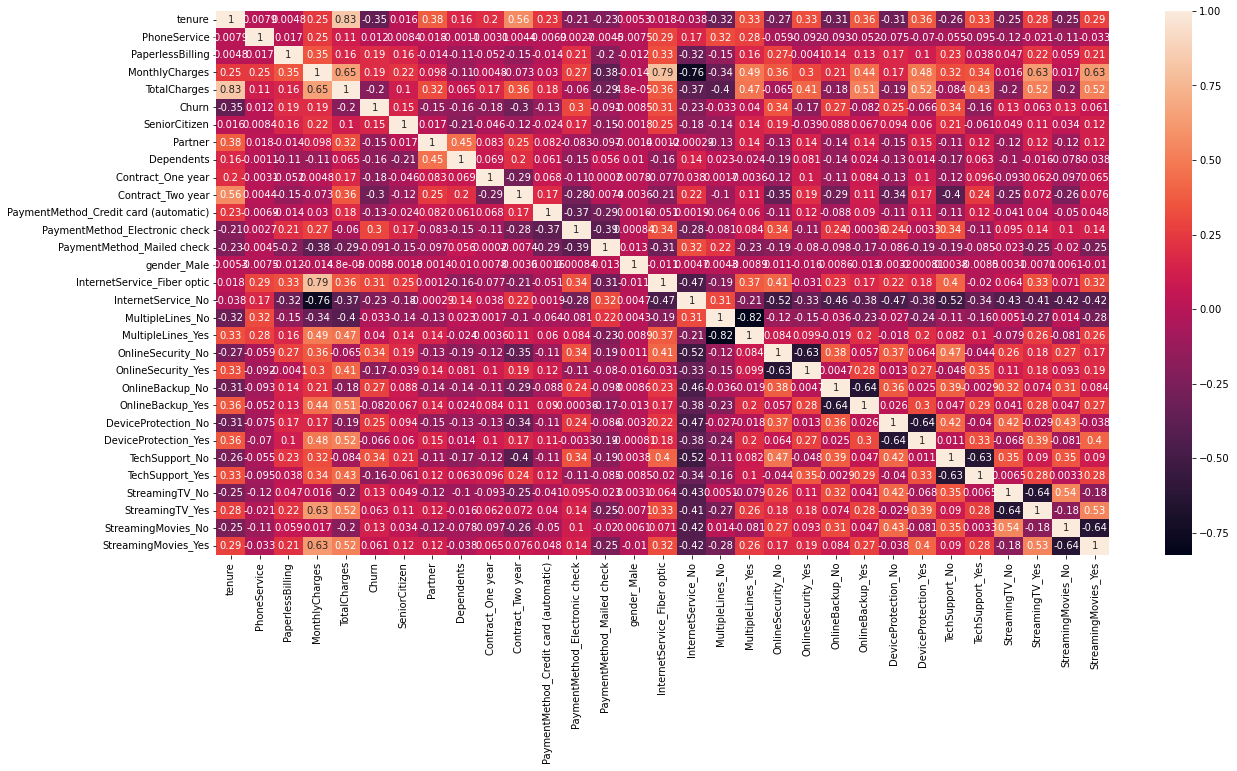

In [50]:
# lets see the correlation matrix
plt.figure(figsize = (20,10))  # size of the figure
sm.heatmap(telecom.corr(), annot = True)
plt.show()

In [51]:
x_test.columns


Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [52]:
x_test.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

## Dropping the highly correlated dummy variables

In [53]:
x_test = x_test.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No','StreamingTV_No','StreamingMovies_No'],1 )
x_train = x_train.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No','StreamingTV_No','StreamingMovies_No'],1)


In [54]:
x_test.columns


Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

## checking the correlation matrix

After dropping the highly correlated variables now lets check the correlation matrix

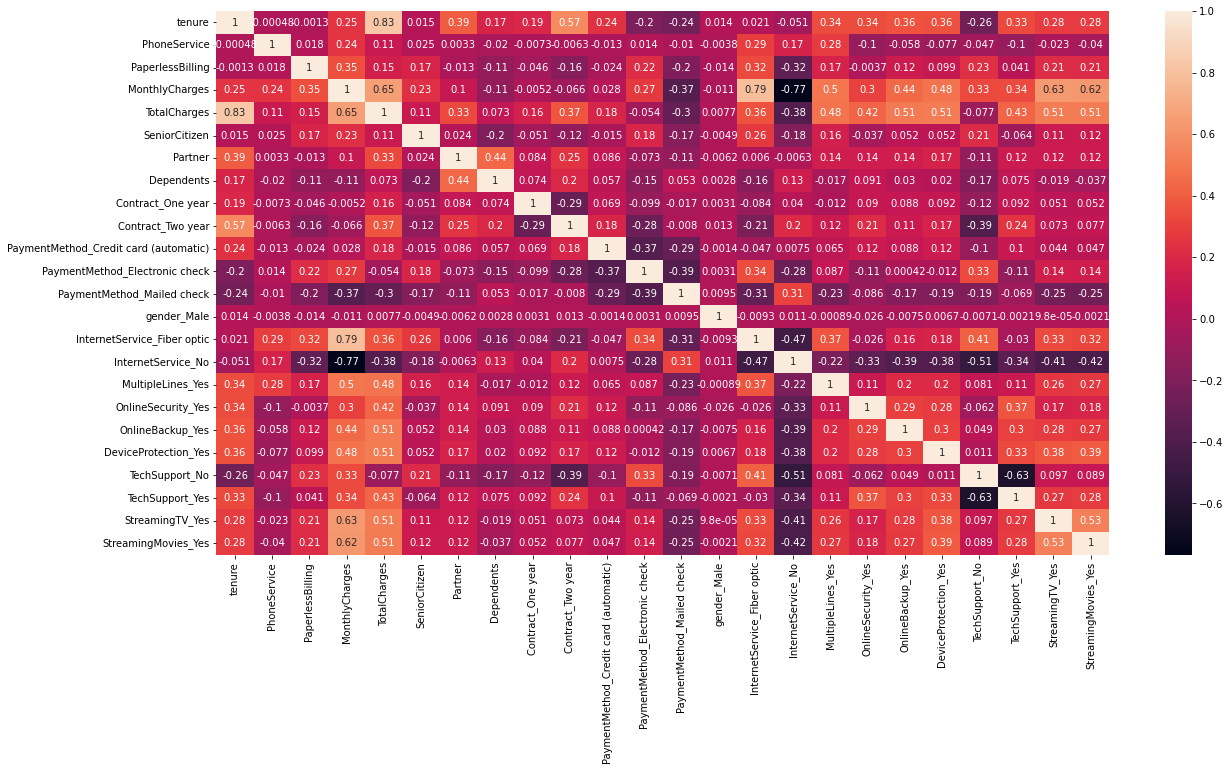

In [55]:
plt.figure(figsize = (20,10))
sm.heatmap(x_train.corr(), annot = True)
plt.show()

## Running your first model

In [56]:
import statsmodels.api as sl

In [57]:
#Logistic Regression model
logm1 = sl.GLM(y_train, (sl.add_constant(x_train)), family = sl.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Fri, 07 Apr 2023   Deviance:                       4009.4
Time:                        18:35:10   Pearson chi2:                 6.07e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.6560      1.352     -2.704      0.007      -6.306      -1.006
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1805      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.0613      1.163     -2.632      0.008      -5.341      -0.781
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No                           -0.2821      0.205     -1.377      0.168      -0.684       0.119
TechSupport_Yes                          -0.3126      0.094     -3.312      0.001      -0.498      -0.128
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## Feature Selection using RFE

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
from sklearn.feature_selection import RFE

In [60]:
 # running RFE with 13 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)

In [61]:
rfe = rfe.fit(x_train, y_train)
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True,  True])

In [62]:
list(zip(x_train.columns,rfe.support_, rfe.ranking_ ))

[('tenure', True, 1),
 ('PhoneService', False, 4),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 7),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 10),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 6),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [63]:
col = x_train.columns[rfe.support_]

In [64]:
x_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

## Assessing the model with stats models

In [65]:
x_train_sl = sl.add_constant(x_train[col])
logm2 = sl.GLM(y_train,x_train_sl, family = sl.families.Binomial() )
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Fri, 07 Apr 2023   Deviance:                       4022.2
Time:                        18:35:30   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.4870      0.177    -14.081      0.000      -2.833      -2.141
tenure                                   -1.5597      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4295      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.4489      0.254     -5.715      0.000      -1.946      -0.952
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_No                            0.2408      0.109      2.210      0.027       0.027       0.454
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.196      0.000       0.249       0.684
=========================================================================================================
"""

In [66]:
# getting the predicted values on the train set
y_train_pred = res.predict(x_train_sl)
y_train_pred[:10]

879     0.192655
5790    0.275618
6498    0.599521
880     0.513584
2784    0.648245
3874    0.414827
5387    0.431189
6623    0.801788
4465    0.228197
5364    0.504594
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19265466, 0.27561773, 0.59952062, 0.51358427, 0.64824489,
       0.4148273 , 0.43118905, 0.80178833, 0.22819745, 0.50459361])

## creating a dataframe with the actual churn flag and the predicted probabilities

In [68]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.192655,879
1,0,0.275618,5790
2,1,0.599521,6498
3,1,0.513584,880
4,1,0.648245,2784


## creating a column 'Predicted' with 1 if churn_prob >0.5 else 0

In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)

In [70]:
# lets see the head
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.192655,879,0
1,0,0.275618,5790,0
2,1,0.599521,6498,1
3,1,0.513584,880,1
4,1,0.648245,2784,1


In [71]:
from sklearn import metrics

In [72]:
y_train_pred_final.Churn

0       0
1       0
2       1
3       1
4       1
       ..
4917    0
4918    0
4919    0
4920    0
4921    0
Name: Churn, Length: 4922, dtype: int64

In [73]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3275  360]
 [ 574  713]]


#Predicted     not_churn     churn
#Actual         
#not_churn      3270          365           
#Churn          579           708


In [74]:
#lets check the over all accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted  ))

0.8102397399431126


## Checking the VIF's

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Checking the VIF for the features of variables
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,MonthlyCharges,19.82
3,TotalCharges,10.39
9,InternetService_Fiber optic,8.92
10,InternetService_No,7.82
0,tenure,7.31
12,TechSupport_No,3.87
13,StreamingTV_Yes,2.98
14,StreamingMovies_Yes,2.94
6,Contract_Two year,2.84
1,PaperlessBilling,2.70


They are few variables with high vif. it's best to drop these variables as they are not helping the model in predictions
and unnessarily making the model complex. the variable 'Phone_service' has highest vif. so lets start dropping that

In [77]:
col = col.drop('MonthlyCharges', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [78]:
# lets rerun the model using the selected variables
x_train_sl = sl.add_constant(x_train[col])
logm3 = sl.GLM(y_train,x_train_sl, family = sl.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Fri, 07 Apr 2023   Deviance:                       4046.2
Time:                        18:36:09   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0342      0.146    -13.885      0.000      -2.321      -1.747
tenure                                   -1.3287      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3617      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.5184      0.170     -3.045      0.002      -0.852      -0.185
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_No                            0.4371      0.101      4.307      0.000       0.238       0.636
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [79]:
y_train_pred = res.predict(x_train_sl).values.reshape(-1)

In [80]:
y_train_pred[: 10]

array([0.22791033, 0.22864008, 0.67489992, 0.61587587, 0.66226714,
       0.41818879, 0.28813539, 0.79513682, 0.17433279, 0.51909857])

In [81]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [82]:
#creating a new coloumn predicted with 1 if churn_prob > 0.5 else 0
y_train_pred_final['Churn_prob'] = y_train_pred_final.Churn_prob.map( lambda x : 1 if x >0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0,879,0
1,0,0,5790,0
2,1,1,6498,1
3,1,1,880,1
4,1,1,2784,1


In [83]:
#lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted  ))

0.8102397399431126


So, over all accuacy not got dropped

##  Lets check the VIF's Again

In [84]:
# Checking the VIF for the features of variables
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,TotalCharges,8.43
0,tenure,6.95
8,InternetService_Fiber optic,3.53
11,TechSupport_No,2.89
5,Contract_Two year,2.76
9,InternetService_No,2.61
13,StreamingMovies_Yes,2.61
12,StreamingTV_Yes,2.60
1,PaperlessBilling,2.58
10,MultipleLines_Yes,2.33


In [85]:
col = col.drop('Contract_Two year', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [86]:
# lets rerun the model using the selected variables
x_train_sl = sl.add_constant(x_train[col])
logm4 = sl.GLM(y_train,x_train_sl, family = sl.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.9
Date:                Fri, 07 Apr 2023   Deviance:                       4093.8
Time:                        18:36:31   Pearson chi2:                 5.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2720
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.4052      0.138    -17.484      0.000      -2.675      -2.136
tenure                                   -1.4702      0.169     -8.725      0.000      -1.800      -1.140
PaperlessBilling                          0.4012      0.089      4.527      0.000       0.227       0.575
TotalCharges                              0.3529      0.174      2.031      0.042       0.012       0.694
SeniorCitizen                             0.5257      0.099      5.291      0.000       0.331       0.720
Contract_One year                        -0.4189      0.119     -3.515      0.000      -0.652      -0.185
PaymentMethod_Credit card (automatic)    -0.4349      0.111     -3.906      0.000      -0.653      -0.217
PaymentMethod_Mailed check               -0.3908      0.110     -3.543      0.000      -0.607      -0.175
InternetService_Fiber optic               0.7799      0.108      7.248      0.000       0.569       0.991
InternetService_No                       -0.5533      0.170     -3.261      0.001      -0.886      -0.221
MultipleLines_Yes                         0.1970      0.093      2.108      0.035       0.014       0.380
TechSupport_No                            0.5510      0.100      5.511      0.000       0.355       0.747
StreamingTV_Yes                           0.2770      0.097      2.868      0.004       0.088       0.466
StreamingMovies_Yes                       0.1785      0.096      1.859      0.063      -0.010       0.367
=========================================================================================================
"""

In [87]:
y_train_pred = res.predict(x_train_sl).values.reshape(-1)

In [88]:
y_train_pred[: 10]

array([0.20062089, 0.18448761, 0.70561261, 0.5958563 , 0.65645936,
       0.41690355, 0.26263012, 0.8314618 , 0.19078568, 0.50763345])

In [89]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [90]:
#creating a new coloumn predicted with 1 if churn_prob > 0.5 else 0
y_train_pred_final['Churn_prob'] = y_train_pred_final.Churn_prob.map( lambda x : 1 if x >0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0,879,0
1,0,0,5790,0
2,1,1,6498,1
3,1,1,880,1
4,1,1,2784,1


In [91]:
#lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted  ))

0.8102397399431126


##  Lets check the VIF's Again

In [92]:
# Checking the VIF for the features of variables
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,TotalCharges,8.28
0,tenure,5.65
7,InternetService_Fiber optic,3.53
10,TechSupport_No,2.89
1,PaperlessBilling,2.57
11,StreamingTV_Yes,2.53
12,StreamingMovies_Yes,2.53
8,InternetService_No,2.39
9,MultipleLines_Yes,2.31
6,PaymentMethod_Mailed check,1.51


In [93]:
col = col.drop('tenure', 1)
col

Index(['PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [94]:
# lets rerun the model using the selected variables
x_train_sl = sl.add_constant(x_train[col])
logm5 = sl.GLM(y_train,x_train_sl, family = sl.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.9
Date:                Fri, 07 Apr 2023   Deviance:                       4189.8
Time:                        18:36:53   Pearson chi2:                 4.90e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2577
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.4360      0.134    -18.229      0.000      -2.698      -2.174
PaperlessBilling                          0.3796      0.088      4.330      0.000       0.208       0.551
TotalCharges                             -1.1258      0.061    -18.377      0.000      -1.246      -1.006
SeniorCitizen                             0.5058      0.099      5.101      0.000       0.311       0.700
Contract_One year                        -0.4955      0.117     -4.231      0.000      -0.725      -0.266
PaymentMethod_Credit card (automatic)    -0.4793      0.110     -4.350      0.000      -0.695      -0.263
PaymentMethod_Mailed check               -0.2146      0.108     -1.996      0.046      -0.425      -0.004
InternetService_Fiber optic               1.2167      0.096     12.699      0.000       1.029       1.405
InternetService_No                       -0.9449      0.163     -5.779      0.000      -1.265      -0.624
MultipleLines_Yes                         0.2539      0.091      2.782      0.005       0.075       0.433
TechSupport_No                            0.4827      0.099      4.867      0.000       0.288       0.677
StreamingTV_Yes                           0.4151      0.094      4.423      0.000       0.231       0.599
StreamingMovies_Yes                       0.3140      0.093      3.360      0.001       0.131       0.497
=========================================================================================================
"""

In [95]:
y_train_pred = res.predict(x_train_sl).values.reshape(-1)

In [96]:
y_train_pred[: 10]

array([0.2672242 , 0.32788584, 0.67698432, 0.6246348 , 0.69645142,
       0.34589179, 0.20474396, 0.81796606, 0.2771682 , 0.51910154])

In [97]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [98]:
#creating a new coloumn predicted with 1 if churn_prob > 0.5 else 0
y_train_pred_final['Churn_prob'] = y_train_pred_final.Churn_prob.map( lambda x : 1 if x >0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0,879,0
1,0,0,5790,0
2,1,1,6498,1
3,1,1,880,1
4,1,1,2784,1


In [99]:
#lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted  ))

0.8102397399431126


##  Lets check the VIF's Again

In [100]:
# Checking the VIF for the features of variables
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,InternetService_Fiber optic,2.98
9,TechSupport_No,2.82
0,PaperlessBilling,2.57
11,StreamingMovies_Yes,2.51
10,StreamingTV_Yes,2.50
8,MultipleLines_Yes,2.31
1,TotalCharges,2.19
7,InternetService_No,1.83
5,PaymentMethod_Mailed check,1.48
4,PaymentMethod_Credit card (automatic),1.34


In [101]:
from sklearn import metrics


In [105]:
#lets take a look at confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3275  360]
 [ 574  713]]


##   Model Evaluation

## Sensitivity and Specificity in python

## Metrics Beyond simply Accuracy

In [106]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false psitives
FN = confusion[1,0]  # false negativies


In [107]:
# lets see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.554001554001554

In [108]:
# Lets us calculate specificity
TN / float(TN+FP)

0.9009628610729024

In [109]:
# Calculate false positive rate - predicting churn when customer does not have churned
print( FP/ float(TN+FP))

0.09903713892709766


In [110]:
# positive prediction value
print (TP/ float(TP+FP))

0.6644920782851818


In [111]:
#Negative predictive value
print ( TN/ float(TN+FN))

0.8508703559366069


## Plotting the ROC Curve

ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classifier system, as the discrimination threshold is varied. ROC curves are widely used in machine learning, medical diagnosis, and many other fields.

To plot an ROC curve, follow these steps:

Train your binary classifier model on the training data.

Predict the probabilities of the test data using your trained model.

Sort the test data based on the predicted probabilities.

Set a threshold value for your classifier. If the predicted probability of a sample is above the threshold, it is classified as positive; otherwise, it is classified as negative.

Calculate the true positive rate (TPR) and the false positive rate (FPR) based on the threshold value.

TPR = true positives / (true positives + false negatives)

FPR = false positives / (false positives + true negatives)

Repeat step 5 for different threshold values.

Plot the TPR against the FPR for all the threshold values. The resulting curve is the ROC curve.

In [112]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr , tpr , thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

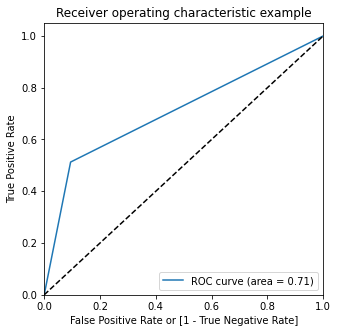

In [118]:
# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

##  Finding the optimal Cutoff

In [119]:
# Now lets create columns with different probability cutooffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers :
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x> i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,879,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5790,0,0,0,0,0,0,0,0,0,0,0
2,1,1,6498,1,1,1,1,1,1,1,1,1,1,1
3,1,1,880,1,1,1,1,1,1,1,1,1,1,1
4,1,1,2784,1,1,1,1,1,1,1,1,1,1,1


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.802722  0.512821  0.905365
0.1   0.1  0.802722  0.512821  0.905365
0.2   0.2  0.802722  0.512821  0.905365
0.3   0.3  0.802722  0.512821  0.905365
0.4   0.4  0.802722  0.512821  0.905365
0.5   0.5  0.802722  0.512821  0.905365
0.6   0.6  0.802722  0.512821  0.905365
0.7   0.7  0.802722  0.512821  0.905365
0.8   0.8  0.802722  0.512821  0.905365
0.9   0.9  0.802722  0.512821  0.905365


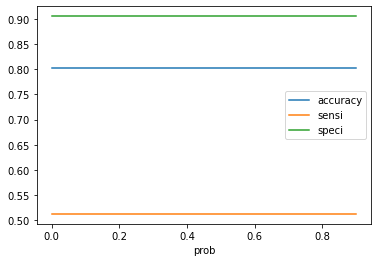

In [121]:
# lets plot the accuarcy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y =['accuracy', 'sensi','speci'])
plt.show()

from the curve above, 0.3 is the optimun point to take it as a cuttoff probabilities

In [126]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,879,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5790,0,0,0,0,0,0,0,0,0,0,0
2,1,1,6498,1,1,1,1,1,1,1,1,1,1,1
3,1,1,880,1,1,1,1,1,1,1,1,1,1,1
4,1,1,2784,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0,0,79,0,0,0,0,0,0,0,0,0,0,0
4918,0,0,3934,0,0,0,0,0,0,0,0,0,0,0
4919,0,0,5964,0,0,0,0,0,0,0,0,0,0,0
4920,0,0,6947,0,0,0,0,0,0,0,0,0,0,0


In [128]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8027224705404307

In [130]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

## precision  TP/TP+FP

In [131]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6644920782851818

###    Recal   TP/TP+FN

In [132]:
confusion[1,1]/ (confusion[1,0]+confusion[1,1])

0.554001554001554

using same utilities for the same

In [133]:
from sklearn.metrics import precision_score, recall_score

In [135]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6573705179282868

In [136]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5128205128205128

## Precision and recall trade off

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [139]:
p,r , thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

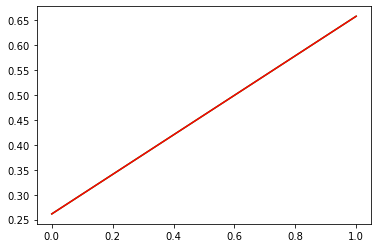

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, p[:-1], 'r-')
plt.show()

###   making Predictions on the test dataset

In [142]:
x_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(x_test[['tenure', 'MonthlyCharges','TotalCharges']])


In [144]:
x_test = x_test[col]

In [145]:
x_test_sl = sl.add_constant(x_test)

In [146]:
y_test_pred = res.predict(x_test_sl)

In [147]:
y_test_pred[:10]

942     0.406608
3730    0.160410
1761    0.055180
2283    0.629598
1872    0.066456
1970    0.712896
2532    0.277608
1616    0.067265
2485    0.623018
5914    0.125418
dtype: float64

In [148]:
#converting y_pred to a dataframe which is array
y_pred_1 = pd.DataFrame(y_test_pred)

In [149]:
# lets see the head
y_pred_1.head()

,0
942,0.406608
3730,0.160410
1761,0.055180
2283,0.629598
1872,0.066456


In [150]:
#converting y_test to a dataframe
y_test_df = pd.DataFrame (y_test)

In [152]:
# putting the CUST ID to dataframe
y_test_df['CustID'] = y_test_df.index

In [154]:
# removing index for both the dataframe to append them side by side
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [155]:
# appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis =1)

In [156]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.406608
1,1,3730,0.160410
2,0,1761,0.055180
3,1,2283,0.629598
4,0,1872,0.066456


In [157]:
# renaming the column
y_pred_final = y_pred_final.rename(columns = {0 : 'Churn_prob'})

In [159]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn', 'Churn_prob'])

In [161]:
# lets see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_prob
0,942,0,0.406608
1,3730,1,0.160410
2,1761,0,0.055180
3,2283,1,0.629598
4,1872,0,0.066456


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map( lambda x : 1 if x>0.3 else 0)

In [163]:
y_pred_final.head()

,CustID,Churn,Churn_prob,final_predicted
0,942,0,0.406608,1
1,3730,1,0.160410,0
2,1761,0,0.055180,0
3,2283,1,0.629598,1
4,1872,0,0.066456,0


In [164]:
# lets check the accuracy of the model
metrics.accuracy_score (y_pred_final.Churn, y_pred_final.final_predicted)

0.7578199052132701

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
confusion2

array([[1197,  331],
       [ 180,  402]], dtype=int64)

In [167]:
tp = confusion2[1,1]
tn = confusion2[0,0]
fp = confusion2[0,1]
fn = confusion2[1,0]

In [168]:
# lets see the sensitivity of the logistic regreesion
tp/ float(tp+fn)

0.6907216494845361

In [169]:
# let us calculate specificity
tn / float(tn+fp)

0.7833769633507853